## Some information about audio data before we start with audio data processing
### What are x and y axis in a audio wave representation?
![Sound wave image](https://swphonetics.files.wordpress.com/2012/03/wavsin01.jpg)
- The y-axis represents sound pressure, the x-axis represents time.

### Standard waveforms
#### Sine waveform
![Sine wave image](https://www.electronics-tutorials.ws/wp-content/uploads/2018/05/waveforms-tim1.gif)

#### Square waveform
![Square waveform image](https://www.electronics-tutorials.ws/wp-content/uploads/2018/05/waveforms-tim3.gif)

#### Rectangular waveform
![Rectangular waveform image](https://www.electronics-tutorials.ws/wp-content/uploads/2018/05/waveforms-tim6.gif)

#### Triangular waveform
![Triangular waveform image](https://www.electronics-tutorials.ws/wp-content/uploads/2018/05/waveforms-tim8.gif)

#### Sawtooth waveform
![Sawtooth waveform image](https://www.electronics-tutorials.ws/wp-content/uploads/2018/05/waveforms-tim9.gif)

In [ ]:
# Run autocomplete
%config Completer.use_jedi=False

<div style="background-color:#B4DBE9; color:#636363;">
    <h1><right>Table of Contents</center></h1>
    <a class="anchor" id="chapter0"></a>    
</div>




* [Chapter 1. Introduction](#chapter1)     
* [Chapter 2. librosa Library Basics](#chapter2)
* [Chapter 3. Audio Processing Basics & Features](#chapter3)
* [Chapter 4. Environmental Audio Classification with Neural Networks](#chapter4)


## $\color{Pink}{\text{Chapter 1. Introduction}}$ <a class="anchor" id="chapter1"></a>



The dataset **"Environmental Sound Classification 50"** consists in 50 WAV files sampled at 16KHz for 50 different classes.To each one of the classes, corresponds 40 audio sample of 5 seconds each. All of these audio files have been concatenated by class in order to have 50 wave files of 3 min. 20sec.


In [ ]:
#Libraries we will need.
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
from tqdm import tqdm
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
import IPython.display as ipd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
%load_ext tensorboard

## $\color{Pink}{\text{Chapter 2. librosa Library Basics}}$ <a class="anchor" id="chapter2"></a>

* [Click to Turn Back to Table of Contents](#chapter0)  

librosa is a python package for music and audio analysis. It provides the building blocks necessary to create music information retrieval systems.


![lr](https://librosa.org/images/librosa_logo_text.png)

You can access the paper of librosa from Brian McFee et al. from here -> [Librosa: Audio and Music Signal Analysis in Python](http://conference.scipy.org/proceedings/scipy2015/pdfs/brian_mcfee.pdf)

*Ref: https://librosa.org/*

To install the librosa follow these steps:
> !pip install librosa

> import librosa

librosa.load() method loads an audio file as a floating point time series. Audio will be automatically resampled to the given rate (default sr=22050). It can be stated as librosa.load(sample, sr=11025) 

* x  → sound time series

* sr → sound frequency (Hz)

We will use an .wav input to analysis. It contains single bark of a dog.

In [ ]:
sample = r"../input/environmental-sound-classification-50/audio/audio/1-100032-A-0.wav" # single bark
x,freq = librosa.load(sample)
sr=freq

In [ ]:
print(x.shape)
print(type(x))
print(freq)
print(type(freq))

Sound can be played with ipd library as follows.

In [ ]:
import IPython.display as ipd
ipd.Audio(sample)

In [ ]:
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(10,3))
plt.title("Single Bark Wave Plot")
librosa.display.waveplot(x,sr=freq)

For 2nd sample .wav we will use multiple bark of a dog.

In [ ]:
sample2 = "../input/urbansound8k/fold10/100795-3-1-1.wav"
x,sr = librosa.load(sample2)
ipd.Audio(x,rate=sr) 

In [ ]:
plt.figure(figsize=(10,3))
plt.title("Multi Bark Wave Plot")
librosa.display.waveplot(x,sr=freq)

## $\color{Pink}{\text{Chapter 3. Sound Processing Basics & Features}}$ <a class="anchor" id="chapter3"></a>


* [Click to Turn Back to Table of Contents](#chapter0)  

The main features of audio can be categories as follows:

* Time domain features

* Frequency domain features

* Time-Frequancy domain features

#### 3.1 Spectogram

A spectrogram is a visual way of representing the signal strength, or “loudness”, of a signal over time at various frequencies present in a particular waveform. Spectrograms are basically two-dimensional graphs, with a third dimension represented by colors. Time runs from left (oldest) to right (youngest) along the horizontal axis. More, the vertical axis represents frequency, which can also be thought of as pitch or tone, with the lowest frequencies at the bottom and the highest frequencies at the top.  The amplitude (or energy or “loudness”) of a particular frequency at a particular time is represented by the third dimension, color, with dark blues corresponding to low amplitudes and brighter colors up through red corresponding to progressively stronger (or louder) amplitudes.

The Short-time Fourier transform (STFT), is a Fourier-related transform used to determine the sinusoidal frequency and phase content of local sections of a signal as it changes over time.

The Fourier transform (a one-dimensional function) of the resulting signal is taken **as the window is slide along the time axis**, resulting in a two-dimensional representation of the signal. Mathematically, this is written as [2]:

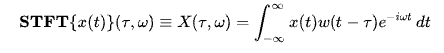

The STFT is invertible, that is, the original signal can be recovered from the transform by the Inverse STFT. 

> librosa.stfx(x)

*[1] Ref= https://pnsn.org/spectrograms/what-is-a-spectrogram , Retrieved = Oct 2021*

*[2] Ref= https://en.wikipedia.org/wiki/Short-time_Fourier_transform , Retrieved = Oct 2021*

In [ ]:
X=librosa.stft(x) #stft -> Short-time Fourier transform
X_db=librosa.amplitude_to_db(abs(X)) #Translation from amplitude to desibel(db) value
plt.figure(figsize=(20,8))
librosa.display.specshow(X_db, sr=sr,x_axis="time",y_axis="hz")
plt.title("Multi Bark Sound Spectogram")
plt.colorbar()

#### 3.2 Harmonic-Percussive Separation (HPS)

The goal of harmonic–percussive separation (HPS) is to decompose a given audio signal into two parts: one consisting of the harmonic and another of the percussive events. Librosa can also separate the initial audio series into harmonic and percussive components.

> librosa.effects.hpss(x)

In [ ]:
sample3 = r"../input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00005.wav"
x,sr = librosa.load(sample3)
ipd.Audio(x,rate=sr) 

In [ ]:
data_h, data_p = librosa.effects.hpss(x)
spec_h = librosa.feature.melspectrogram(data_h, sr=sr)
spec_p = librosa.feature.melspectrogram(data_p, sr=sr)
db_spec_h = librosa.power_to_db(spec_h,ref=np.max)
db_spec_p = librosa.power_to_db(spec_p,ref=np.max)

##### Harmonics Only:

In [ ]:
ipd.Audio(data_h,rate=sr) 

In [ ]:
librosa.display.specshow(db_spec_h,y_axis='mel', x_axis='s', sr=sr)
plt.title("Harmonic Mel Spectogram")
plt.colorbar()

##### Percussion Only:

In [ ]:
ipd.Audio(data_p,rate=sr) 

In [ ]:
librosa.display.specshow(db_spec_p,y_axis='mel', x_axis='s', sr=sr)
plt.title("Percuisive Mel Spectogram")
plt.colorbar();

#### 3.3 Mel-Frequency Cepstral Coefficients (MFCC)

In sound processing, the mel-frequency cepstrum (MFC) is a representation of the short-term power spectrum of a sound, based on a linear cosine transform of a log power spectrum on a nonlinear mel scale of frequency. Mel-frequency cepstral coefficients (MFCCs) are coefficients that collectively make up an MFC. They are derived from a type of cepstral representation of the audio clip (a nonlinear "spectrum-of-a-spectrum") [3]. 

The Mel Frequency Cepstral Coefficients (MFCC) are commonly used in order to extract essential information from a voice signal and became a popular feature extractor used in audio processing.

*[3] Ref:  Min Xu; et al. (2004). "HMM-based audio keyword generation" (PDF). In Kiyoharu Aizawa; Yuichi Nakamura; Shin'ichi Satoh (eds.). Advances in Multimedia Information Processing – PCM 2004: 5th Pacific Rim Conference on Multimedia. Springer. ISBN 978-3-540-23985-7. Archived from the original (PDF) on 2007-05-10*

In [ ]:
mfcc=librosa.feature.mfcc(x,sr=sr)
print("shape of mfcc:" ,mfcc.shape)


plt.figure(figsize=(15,6))
librosa.display.specshow(mfcc,x_axis="s")
plt.title("Mel-Frequency Cepstral Coefficients")
plt.colorbar()

#### 3.4 Zero Crossing Rate (ZCR)


The zero-crossing rate (ZCR) is the rate at which a signal changes from positive to zero to negative or from negative to zero to positive. Its value has been used in both speech recognition and music information retrieval, being a key feature to classify percussive sounds.

![zcr](https://upload.wikimedia.org/wikipedia/commons/0/03/Zero_crossing.svg)

*Image Taken: Wikipedia*

In [ ]:
zero_crossing=librosa.zero_crossings(x)
print("Type of Zero Crossing Rate",type(zero_crossing))
print(zero_crossing, " --> See it contains booleans")
print("Total Number of Zero Crossing is: ",sum(zero_crossing))

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Zero Crossing Rate")
plt.plot(x[4000:5100])
plt.grid()

#### 3.5 Spectral Centroid

The spectral centroid is a measure used in digital signal processing to characterise a spectrum. It indicates where the center of mass of the spectrum is located. Perceptually, it has a robust connection with the impression of brightness of a sound.

In [ ]:
spec_cent=librosa.feature.spectral_centroid(x)
print(spec_cent.shape)

plt.figure(figsize=(15,5))
plt.title("Spectral Centroid")
plt.semilogy(spec_cent.T, "r")
plt.ylabel("Hz")

#### 3.6 Spectral Roll off

Spectral rolloff is the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies.

In [ ]:
spec_roll=librosa.feature.spectral_rolloff(x,sr=sr)
print(spec_roll.shape)

plt.figure(figsize=(15,5))
plt.title("Spectral Roll off")
plt.semilogy(spec_roll.T,"r")
plt.ylabel("Hz")

#### 3.7 Chroma Feature

The main idea of chroma features is to aggregate all spectral information that relates to a given pitch class into a single coefficient. It is a powerful representation for sound in which 12 parts representing the 12 different halftones (chroma) of the spectrum musical octave are specified: A, A#, B, C, C#, D, D#, E, F, F#, G, G#.

In [ ]:
y, sr = librosa.load(sample3)
chroma=librosa.feature.chroma_stft(y=y, sr=sr)
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

#### 3.7 Spectral Bandwidth

Bandwidth is the difference between the upper and lower frequencies in a continuous band of frequencies. It is typically measured in hertz, and depending on context, may specifically refer to passband bandwidth or baseband bandwidth.

In [ ]:
spec_band=librosa.feature.spectral_bandwidth(x,sr=sr)
print("Spectral Bandwidth Shape: ",spec_band.shape)
print("Spectral Bandwidth: ", spec_band)

#### 3.8 Root Mean Squared Energy

In [ ]:
x,sr = librosa.load(sample3)


In [ ]:
S = librosa.magphase(librosa.stft(x, window=np.ones, center=False))[0]
RMSEn= librosa.feature.rms(S=S)
print(RMSEn.shape)


fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(RMSEn)
plt.title("Root Mean Squared Energy & log Pawer Spectogram")
ax[0].semilogy(times, RMSEn[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')
plt.show()

## $\color{Pink}{\text{Chapter 4. Environmental Audio Classification with CNN}}$ <a class="anchor" id="chapter4"></a>


* [Click to Turn Back to Table of Contents](#chapter0)  

In [ ]:
CSV_FILE_PATH = "../input/environmental-sound-classification-50/esc50.csv"  # path of csv file
DATA_PATH = "../input/environmental-sound-classification-50/audio/audio/44100/" # path to folder containing audio files

In [ ]:
df = pd.read_csv(CSV_FILE_PATH)
df.head()
print("shape of df: ", df.shape)

We drop the un releated columns in the dataframe.

In [ ]:
df=df.drop(['fold','esc10','src_file','take'], axis=1)

Print the names of the classes in the dataset.

In [ ]:
classes = df['category'].unique()
print("Classes are: ",classes)
print("# of Classes are: ",classes.shape[0])

In [ ]:
class_dict = {i:x for x,i in enumerate(classes)}


In [ ]:
#drop duplicates if there are any in filename...
df = df.drop_duplicates(subset=['filename'])

In [ ]:
df['target'] = df['category'].map(class_dict)
df.head()
print("df shape: ", df.shape)

In [ ]:
X = []
y = []

* We use Mel-Frequency Cepstral Coefficients (mfcc=40) as sampling and prepering the input.


In [ ]:
for data in tqdm(df.iterrows(),  desc='Progress'):
    sig , sr = librosa.load(DATA_PATH+data[1][0])
    mfcc_ = librosa.feature.mfcc(sig , sr=sr, n_mfcc=40)
    X.append(mfcc_)
    y.append(data[1][1])


CNN takes input as (Number of Images , Height , Width , Channel). Therefore,we will reshape the input as Number of Images , Height , Width , 1. 

In [ ]:
X = np.array(X) 
y = np.array(y)

In [ ]:
X.shape

In [ ]:
y = tf.keras.utils.to_categorical(y , num_classes=50)
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)


In [ ]:
print("X Shape is: ", X.shape)
print("y Shape is: ", y.shape)

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size=0.2, random_state=42)

In [ ]:
INPUTSHAPE = (40,216,1)

In [ ]:
model =  models.Sequential([
    
                          layers.Conv2D(32 , (3,3),activation = 'relu',padding='valid', input_shape = INPUTSHAPE),  
                          layers.MaxPooling2D(2, padding='same'),
                          layers.Conv2D(128, (3,3), activation='relu',padding='valid'),
                          layers.MaxPooling2D(2, padding='same'),
                          layers.Dropout(0.3),
                          layers.Conv2D(128, (3,3), activation='relu',padding='valid'),
                          layers.MaxPooling2D(2, padding='same'),
                          layers.Dropout(0.3),
                          layers.GlobalAveragePooling2D(),
                          layers.Dense(512 , activation = 'relu'),
                          layers.Dense(50 , activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = 'acc')
model.summary()

In [ ]:
batch_size = 8
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=8, verbose=0, mode='auto',
    baseline=None, restore_best_weights=False)

history = model.fit(X_train,y_train ,
            validation_data=(X_test,y_test),
            epochs=40,
            callbacks = [callback],batch_size=batch_size)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

* As seen model overfits and stoped by early stopping.